# EXTRAER DATOS DEL ETABS

El codigo proporcionado nos permitirá extrar cualquier tabla que se encuentre en el programa Etabs.

El trabajo de esta será identificar las tablas con las que queremos trabajar y el proceso que se realiza.

## LIBRERIAS

In [1]:
import sys
import os
import comtypes.client
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

## FUNCION PARA CONECTARNOS AL ETABS

Esta funcion se puede usar para cualquier del programa de Etabs que tengas abierto y ejecutado.

In [2]:
def connect_to_etabs():
    helper = comtypes.client.CreateObject('ETABSv1.Helper');
    helper = helper.QueryInterface(comtypes.gen.ETABSv1.cHelper);
    try:
        myETABSObject = helper.GetObject("CSI.ETABS.API.ETABSObject");
        print("Connected to ETABS model");
    except (OSError, comtypes.COMError):
        print("No running instance of the program found or failed to attach.");
        sys.exit(-1);
    SapModel = myETABSObject.SapModel;
    return SapModel,myETABSObject,helper;

SapModel, myETABSObject, helper = connect_to_etabs()

Connected to ETABS model


---

Nombre de la Tabla: Story Drifts

**Filtros:**

OutputCase:  DERIVA

StepType: Max

Direction: X

## PLOTEANDO STORY DRIFTS

In [12]:
table = SapModel.DatabaseTables.GetTableForDisplayArray("Story Drifts",GroupName="")
cols = table[2]
noOfRows = table[3]
vals = np.array_split(table[4],noOfRows)
df = pd.DataFrame(vals)
df.columns = cols
df

,Story,OutputCase,CaseType,StepType,Direction,Drift,Label,X,Y,Z
0,NIVEL 10,SX DINAMICO,LinRespSpec,Max,X,0.000984,39,20250,0,33600
1,NIVEL 10,SX DINAMICO,LinRespSpec,Max,Y,0.00042,93,0,4905,33600
2,NIVEL 10,SY DINAMICO,LinRespSpec,Max,X,0.000363,39,20250,0,33600
3,NIVEL 10,SY DINAMICO,LinRespSpec,Max,Y,0.000984,93,0,4905,33600
4,NIVEL 10,DERIVA X,Combination,Max,X,0.00443,39,20250,0,33600
...,...,...,...,...,...,...,...,...,...,...
115,NIVEL 1,DERIVA X,Combination,Min,Y,0.000917,18,0,2980,4350
116,NIVEL 1,DERIVA Y,Combination,Max,X,0.00073,27,12930,2980,4350
117,NIVEL 1,DERIVA Y,Combination,Max,Y,0.001713,18,0,2980,4350
118,NIVEL 1,DERIVA Y,Combination,Min,X,0.00073,27,12930,2980,4350


In [13]:
df = df[df.OutputCase.isin(["DERIVA X"])]
df = df[df.StepType.isin(["Max"])]
df = df[df.Direction.isin(["X"])]
df

,Story,OutputCase,CaseType,StepType,Direction,Drift,Label,X,Y,Z
4,NIVEL 10,DERIVA X,Combination,Max,X,0.00443,39,20250,0,33600
16,NIVEL 9,DERIVA X,Combination,Max,X,0.004876,39,20250,0,30350
28,NIVEL 8,DERIVA X,Combination,Max,X,0.005284,39,20250,0,27100
40,NIVEL 7,DERIVA X,Combination,Max,X,0.005639,39,20250,0,23850
52,NIVEL 6,DERIVA X,Combination,Max,X,0.005878,39,20250,0,20600
64,NIVEL 5,DERIVA X,Combination,Max,X,0.005956,39,20250,0,17350
76,NIVEL 4,DERIVA X,Combination,Max,X,0.005805,39,20250,0,14100
88,NIVEL 3,DERIVA X,Combination,Max,X,0.005298,39,20250,0,10850
100,NIVEL 2,DERIVA X,Combination,Max,X,0.004305,39,20250,0,7600
112,NIVEL 1,DERIVA X,Combination,Max,X,0.001999,185,12280,2980,4350


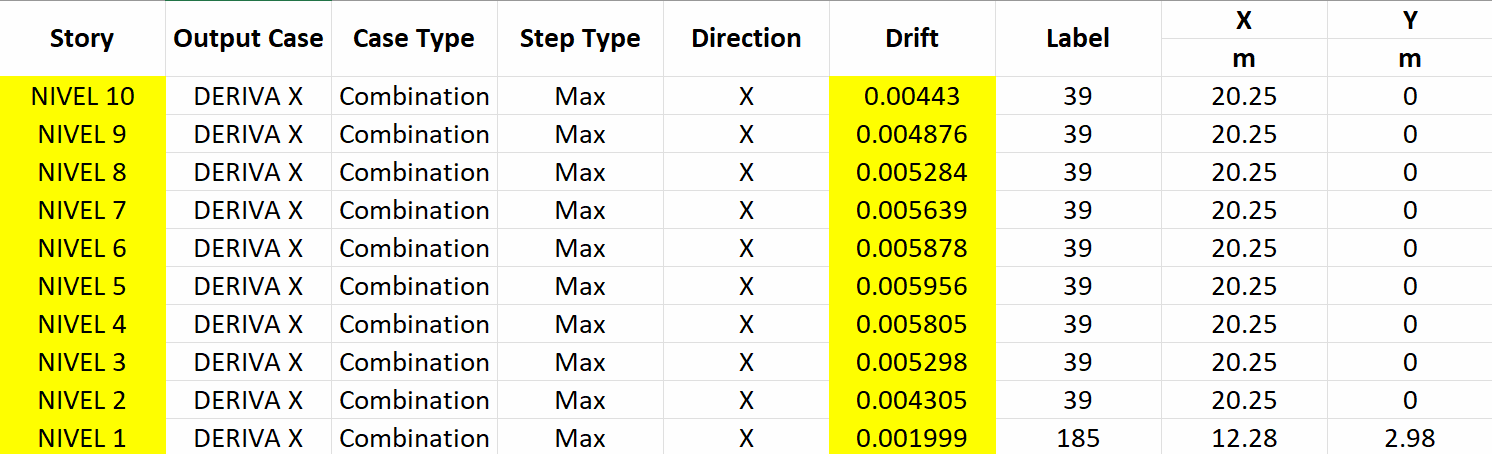

In [14]:
df.drop(["CaseType","StepType", "Label", "X", "Y"], axis=1, inplace=True)
df

,Story,OutputCase,Direction,Drift,Z
4,NIVEL 10,DERIVA X,X,0.00443,33600
16,NIVEL 9,DERIVA X,X,0.004876,30350
28,NIVEL 8,DERIVA X,X,0.005284,27100
40,NIVEL 7,DERIVA X,X,0.005639,23850
52,NIVEL 6,DERIVA X,X,0.005878,20600
64,NIVEL 5,DERIVA X,X,0.005956,17350
76,NIVEL 4,DERIVA X,X,0.005805,14100
88,NIVEL 3,DERIVA X,X,0.005298,10850
100,NIVEL 2,DERIVA X,X,0.004305,7600
112,NIVEL 1,DERIVA X,X,0.001999,4350


In [15]:
new_row = {"Story": ["BASE"],
           "OutputCase": ["DERIVA X"],
           "Direction": ["X"],
           "Drift": [0.0],
           "Z": [0.0],}
dfaux = pd.DataFrame(new_row)
dfaux

,Story,OutputCase,Direction,Drift,Z
0,BASE,DERIVA X,X,0.0,0.0


In [16]:
df = pd.concat([df, dfaux ], ignore_index=True)
df

,Story,OutputCase,Direction,Drift,Z
0,NIVEL 10,DERIVA X,X,0.00443,33600
1,NIVEL 9,DERIVA X,X,0.004876,30350
2,NIVEL 8,DERIVA X,X,0.005284,27100
3,NIVEL 7,DERIVA X,X,0.005639,23850
4,NIVEL 6,DERIVA X,X,0.005878,20600
5,NIVEL 5,DERIVA X,X,0.005956,17350
6,NIVEL 4,DERIVA X,X,0.005805,14100
7,NIVEL 3,DERIVA X,X,0.005298,10850
8,NIVEL 2,DERIVA X,X,0.004305,7600
9,NIVEL 1,DERIVA X,X,0.001999,4350


In [17]:
df = df.reset_index(drop=True)  
df

,Story,OutputCase,Direction,Drift,Z
0,NIVEL 10,DERIVA X,X,0.00443,33600
1,NIVEL 9,DERIVA X,X,0.004876,30350
2,NIVEL 8,DERIVA X,X,0.005284,27100
3,NIVEL 7,DERIVA X,X,0.005639,23850
4,NIVEL 6,DERIVA X,X,0.005878,20600
5,NIVEL 5,DERIVA X,X,0.005956,17350
6,NIVEL 4,DERIVA X,X,0.005805,14100
7,NIVEL 3,DERIVA X,X,0.005298,10850
8,NIVEL 2,DERIVA X,X,0.004305,7600
9,NIVEL 1,DERIVA X,X,0.001999,4350


In [19]:
stories = len(df["Story"])  
stories

11

In [20]:
limite = 0.007
df["Limit"] = limite  
df

,Story,OutputCase,Direction,Drift,Z,Limit
0,NIVEL 10,DERIVA X,X,0.00443,33600,0.007
1,NIVEL 9,DERIVA X,X,0.004876,30350,0.007
2,NIVEL 8,DERIVA X,X,0.005284,27100,0.007
3,NIVEL 7,DERIVA X,X,0.005639,23850,0.007
4,NIVEL 6,DERIVA X,X,0.005878,20600,0.007
5,NIVEL 5,DERIVA X,X,0.005956,17350,0.007
6,NIVEL 4,DERIVA X,X,0.005805,14100,0.007
7,NIVEL 3,DERIVA X,X,0.005298,10850,0.007
8,NIVEL 2,DERIVA X,X,0.004305,7600,0.007
9,NIVEL 1,DERIVA X,X,0.001999,4350,0.007


In [26]:
df["Drift"] = df["Drift"].astype(float) 
df["Z"] = df["Z"].astype(float) 

# Graficando Distorciones de piso

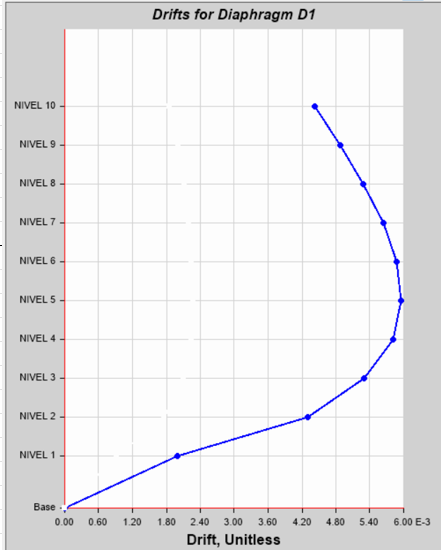

In [47]:
h_max =  max(df["Z"])/1000

In [52]:
x_limit = [limite, limite]
y_limit = [0, h_max*1.1]

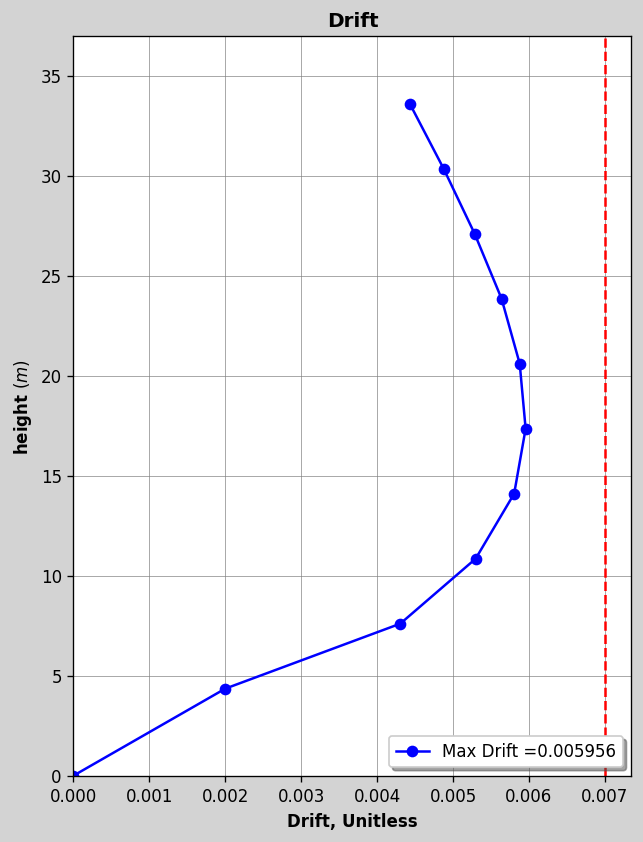

In [58]:
fig, ax = plt.subplots(figsize=(6, 8), facecolor = "lightgray", dpi=120)
ax.plot(df["Drift"],df["Z"]/1000,"bo-")  
ax.plot(x_limit, y_limit, 'r--', linewidth=1.5)
ax.set_title("Drift",fontweight="bold")
ax.set_xlabel("Drift, Unitless",fontweight="bold")
ax.set_ylabel("height $(m)$",fontweight="bold")
ax.grid(True,linestyle='-',color='gray', linewidth=0.4)
ax.set_xlim(0)
ax.set_ylim(0,h_max*1.1)

label = ["Max Drift ="+ str(max(df["Drift"]))] 
ax.legend( label , loc='lower right', shadow=True)
plt.savefig("Drift.png",dpi=300, bbox_inches='tight')

plt.show()

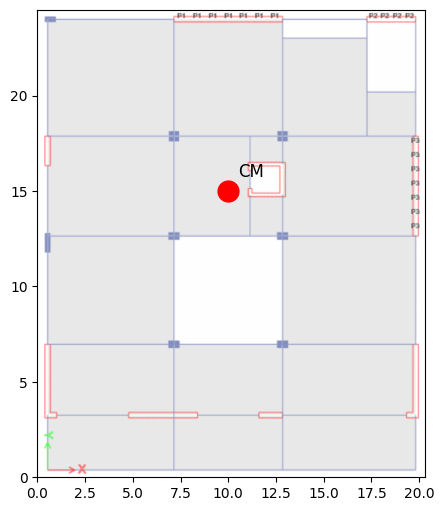

In [73]:
# x = [0,20,20,0,0]
# y = [0,0,25,25,0]
CM_x = [10]
CM_y = [15]

img = plt.imread("Planta.png")  

plt.figure(figsize=(5,7))
# plt.plot(x,y, color = 'black')
plt.plot(CM_x,CM_y, color = 'red', marker = 'o', markersize = 15)
img = plt.imread("Planta.png")
# plt.xlim(0,12)
# plt.ylim(0,20)
plt.imshow(img,extent=[0,20.30,-0,24.50],aspect='equal',alpha=0.7)
plt.text(CM_x[0]*1.05, CM_y[0]*1.05, "CM", fontsize = 12, color = "k")

plt.show()

In [74]:
table = SapModel.DatabaseTables.GetTableForDisplayArray("Functions - Response Spectrum - Peru NTE E030 2014",GroupName="")
cols = table[2]
noOfRows = table[3]
vals = np.array_split(table[4],noOfRows)
df = pd.DataFrame(vals)
df.columns = cols
df

,Name,Period,Value,Zone,OccCat,SoilType,Ia,Ip,R0,DampRatio,GUID
0,ESPECTRO E.030-2018,0,0.1875,4,C,S1,1,1,6,0.05,22df9702-365d-42cd-b311-fea4db547589
1,ESPECTRO E.030-2018,0.1,0.1875,None,None,None,None,None,None,None,None
2,ESPECTRO E.030-2018,0.2,0.1875,None,None,None,None,None,None,None,None
3,ESPECTRO E.030-2018,0.3,0.1875,None,None,None,None,None,None,None,None
4,ESPECTRO E.030-2018,0.4,0.1875,None,None,None,None,None,None,None,None
5,ESPECTRO E.030-2018,0.5,0.15,None,None,None,None,None,None,None,None
6,ESPECTRO E.030-2018,0.6,0.125,None,None,None,None,None,None,None,None
7,ESPECTRO E.030-2018,0.7,0.107143,None,None,None,None,None,None,None,None
8,ESPECTRO E.030-2018,0.8,0.09375,None,None,None,None,None,None,None,None
9,ESPECTRO E.030-2018,0.9,0.083333,None,None,None,None,None,None,None,None


In [75]:
df["Period"] = df["Period"].astype(float) 
df["Value"] = df["Value"].astype(float) 

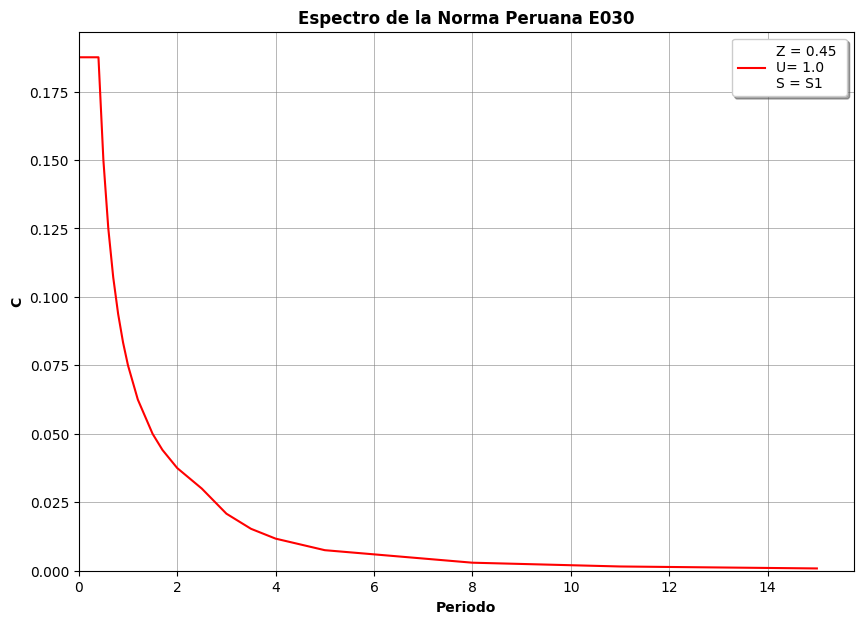

In [83]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(df["Period"],df["Value"],"r-")  
ax.set_title("Espectro de la Norma Peruana E030",fontweight="bold")
ax.set_xlabel("Periodo",fontweight="bold")
ax.set_ylabel("C",fontweight="bold")
ax.grid(True,linestyle='-',color='gray', linewidth=0.4)
ax.set_xlim(0)
ax.set_ylim(0)

Z = 0.45
U = 1.0
S = "S1"
Parm = [f"Z = {Z} \nU= {U} \nS = {S}"]

ax.legend( Parm , loc='upper right', shadow=True)

plt.show()